In [ ]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


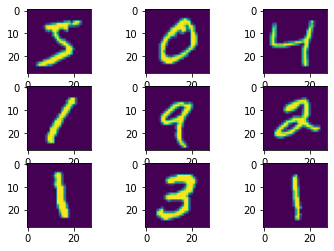

In [ ]:
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(X_train[i])
plt.show()

In [ ]:
X = X_test
X_train =X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#chuyen doi tu RGB 0-255 qua Gray 0-1
X_train/=255
X_test/=255

from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
#tạo lớp ẩn
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation="softmax"))
model.summary()
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=128,epochs =50, verbose=1,validation_data=(X_test,y_test))


Epoch 1/50
469/469 [==============================] - 10s 19ms/step - loss: 0.2427 - accuracy: 0.9254 - val_loss: 0.1078 - val_accuracy: 0.9666
Epoch 2/50
469/469 [==============================] - 9s 20ms/step - loss: 0.1012 - accuracy: 0.9691 - val_loss: 0.1154 - val_accuracy: 0.9653
Epoch 3/50
469/469 [==============================] - 9s 19ms/step - loss: 0.0738 - accuracy: 0.9770 - val_loss: 0.0780 - val_accuracy: 0.9773
Epoch 4/50
469/469 [==============================] - 9s 18ms/step - loss: 0.0585 - accuracy: 0.9821 - val_loss: 0.0987 - val_accuracy: 0.9731
Epoch 5/50
469/469 [==============================] - 9s 18ms/step - loss: 0.0488 - accuracy: 0.9855 - val_loss: 0.0767 - val_accuracy: 0.9794
Epoch 6/50
469/469 [==============================] - 9s 19ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0687 - val_accuracy: 0.9833
Epoch 7/50
469/469 [==============================] - 9s 18ms/step - loss: 0.0364 - accuracy: 0.9887 - val_loss: 0.0784 - val_accuracy: 0.982

In [ ]:
model.save('MINST_ANN.h5') #luu du lieu

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss =', score[0])
print('Test accurracy =', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.1944 - accuracy: 0.9838
Test loss = 0.19436407089233398
Test accurracy = 0.9837999939918518


In [ ]:
history=model.fit(X_train, y_train, batch_size=128,epochs =20, verbose=1,validation_data=(X_test,y_test))

Epoch 1/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0107 - accuracy: 0.9980 - val_loss: 0.1843 - val_accuracy: 0.9844
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0095 - accuracy: 0.9981 - val_loss: 0.1822 - val_accuracy: 0.9837
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0084 - accuracy: 0.9984 - val_loss: 0.2142 - val_accuracy: 0.9834
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0089 - accuracy: 0.9982 - val_loss: 0.1748 - val_accuracy: 0.9858
Epoch 5/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0110 - accuracy: 0.9981 - val_loss: 0.2030 - val_accuracy: 0.9837
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0098 - accuracy: 0.9982 - val_loss: 0.2065 - val_accuracy: 0.9847
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0093 - accuracy: 0.9981 - val_loss: 0.2084 - val_accuracy: 0.9842

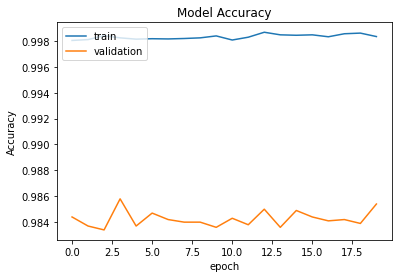

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

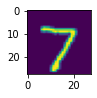

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


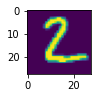

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


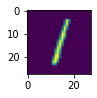

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


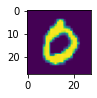

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


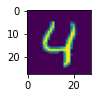

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


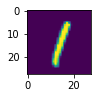

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


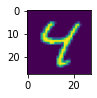

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


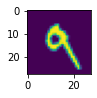

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


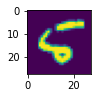

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
import numpy as np
y_pred = model.predict(X_test)
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X[i])
  plt.show()
  print(np.round(y_pred[i]))